In [3]:
import scienceplots
import matplotlib.pyplot as plt
import numpy as np

<>:15: SyntaxWarning: invalid escape sequence '\%'
<>:15: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_121100/892060286.py:15: SyntaxWarning: invalid escape sequence '\%'
  ax.set_ylabel(f"Performance (\%)", fontsize = 20)


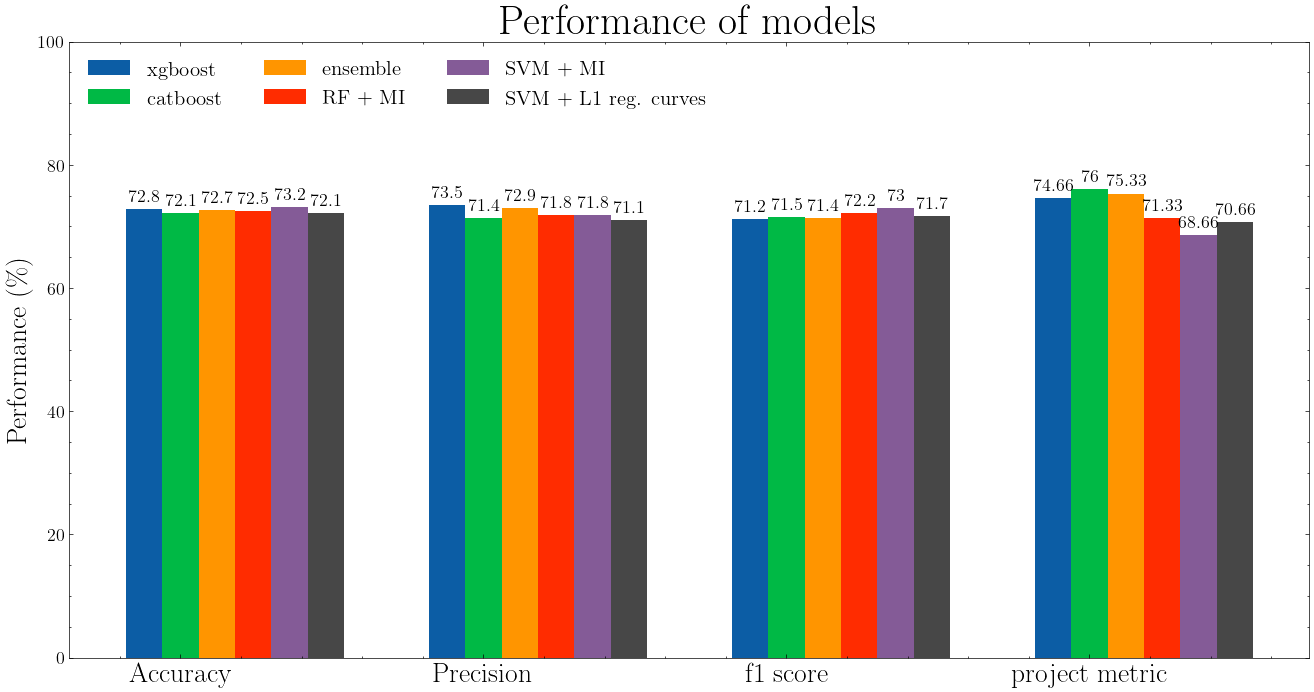

In [ ]:
metrics = ('Accuracy', 'Precision', 'f1 score', 'project metric')
models_performance = {
    'xgboost' : (72.8, 73.5, 71.2, 7466/10000 * 100),
    'catboost' : (72.1, 71.4, 71.5, 7600/10000 * 100),
    'ensemble' : (72.7, 72.9, 71.4, 7533/10000 * 100),
    'RF + MI' : (72.5, 71.8, 72.2, 7133/10000 * 100),
    'SVM + MI' : (73.2, 71.8, 73.0, 6866/10000 * 100),
    'SVM + L1 reg. curves' : (72.1, 71.1, 71.7, 7066/10000 * 100),
}

plt.rcParams['font.size'] = 13
with plt.style.context('science'):
    fig, ax = plt.subplots(1, 1, figsize=(16,8), dpi = 100)
    
    x = np.arange(len(metrics))  # the label locations
    width = 0.12
    multiplier = 0

    for attribute, measurement in models_performance.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    ax.set_ylabel(f"Performance (\%)", fontsize = 20)
    ax.set_title('Performance of models', fontsize = 30)
    ax.set_xticks(x + width, metrics, fontsize = 20)
    ax.legend(loc='upper left', ncols=3, fontsize = 15)
    ax.set_ylim(0, 100)
    
    plt.show()

<>:17: SyntaxWarning: invalid escape sequence '\%'
<>:17: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_121100/4015358183.py:17: SyntaxWarning: invalid escape sequence '\%'
  ax.set_ylabel("Performance (\%)", fontsize=20)


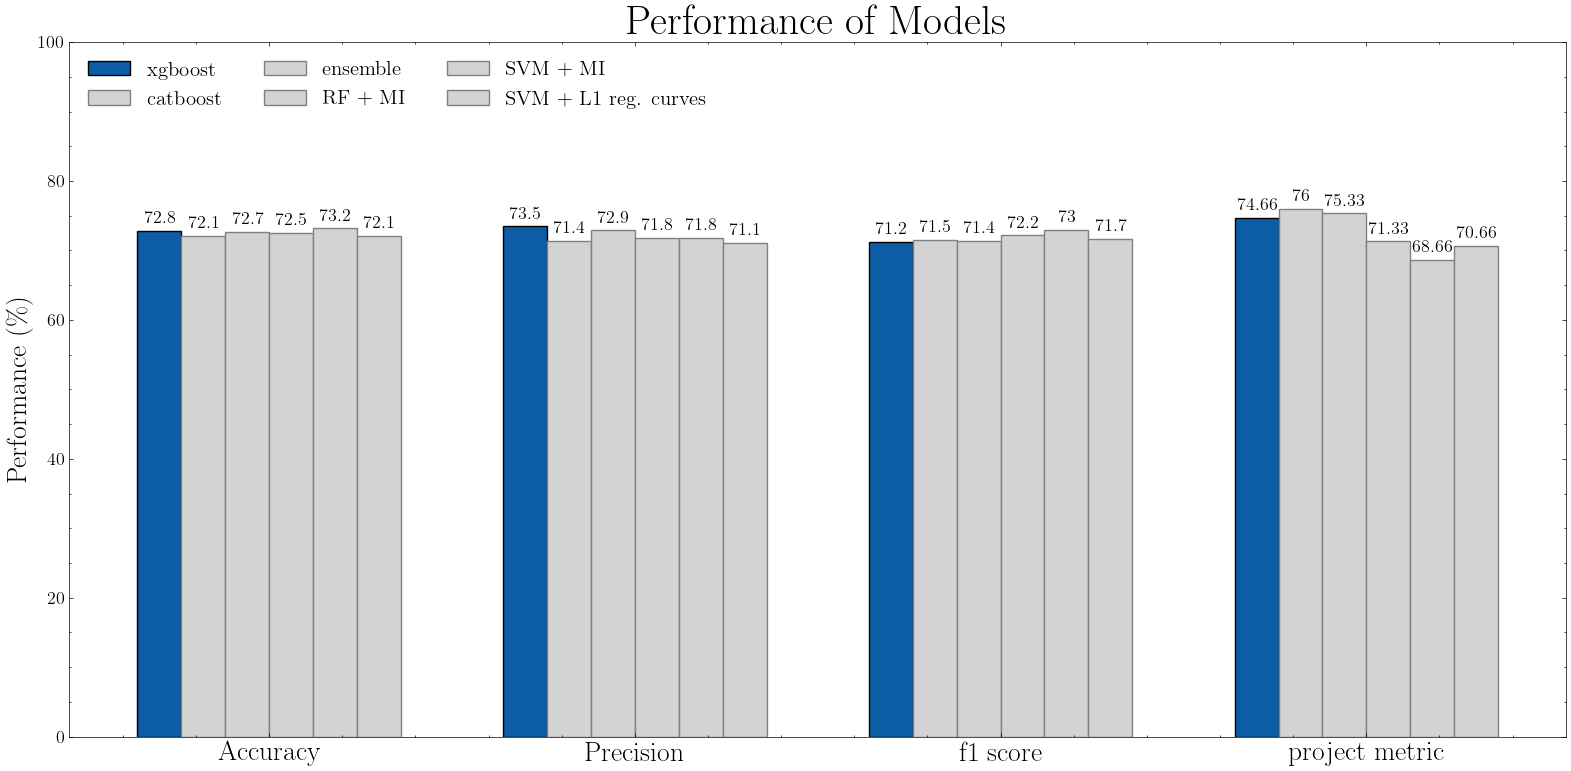

In [119]:
plt.rcParams['font.size'] = 13
with plt.style.context('science'):
    fig, ax = plt.subplots(1, 1, figsize=(16, 8), dpi=100)
    
    x = np.arange(len(metrics))  # the label locations
    width = 0.12
    multiplier = 0

    for attribute, measurement in models_performance.items():
        offset = width * multiplier
        color = 'C0' if attribute == 'xgboost' else 'lightgray'  # Highlight xgboost
        edgecolor = 'black' if attribute == 'xgboost' else 'gray'
        rects = ax.bar(x + offset, measurement, width, label=attribute, color=color, edgecolor=edgecolor)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    ax.set_ylabel("Performance (\%)", fontsize=20)
    ax.set_title("Performance of Models", fontsize=30)
    ax.set_xticks(x + width * (len(models_performance) - 1) / 2)
    ax.set_xticklabels(metrics, fontsize=20)
    ax.legend(loc='upper left', ncols=3, fontsize=15)
    ax.set_ylim(0, 100)

    plt.tight_layout()
    plt.show()

# Feature importance

In [ ]:
method = ('Permutation importance', 'Mutual information')
feature_importance = {
    '2' : (0.081),
    '6' : (0.0821),
    'f1_score' : (0.7679),
    'project metric' : (),
}

In [113]:
PI = {
    '2' : 0.08094117647058828,
    '6' : 0.08211764705882355,
    '115' : 0.07670588235294114,
    '283' : 0.04070588235294115,
    '351' : 0.022823529411764687,
    '402' : 0.010823529411764742,
    '414' : 0.008941176470588253,
    '425' : 0.0051764705882353605,
    '462' : 0.00352941176470587
}

MI = {'2' : 0.090186,
'6' : 0.072988,
'5' : 0.065392,
'3' : 0.063995,
'8' : 0.056068,
'4' : 0.054825,
'9' : 0.047704,
'1' : 0.046945,
'7' : 0.045904,
}

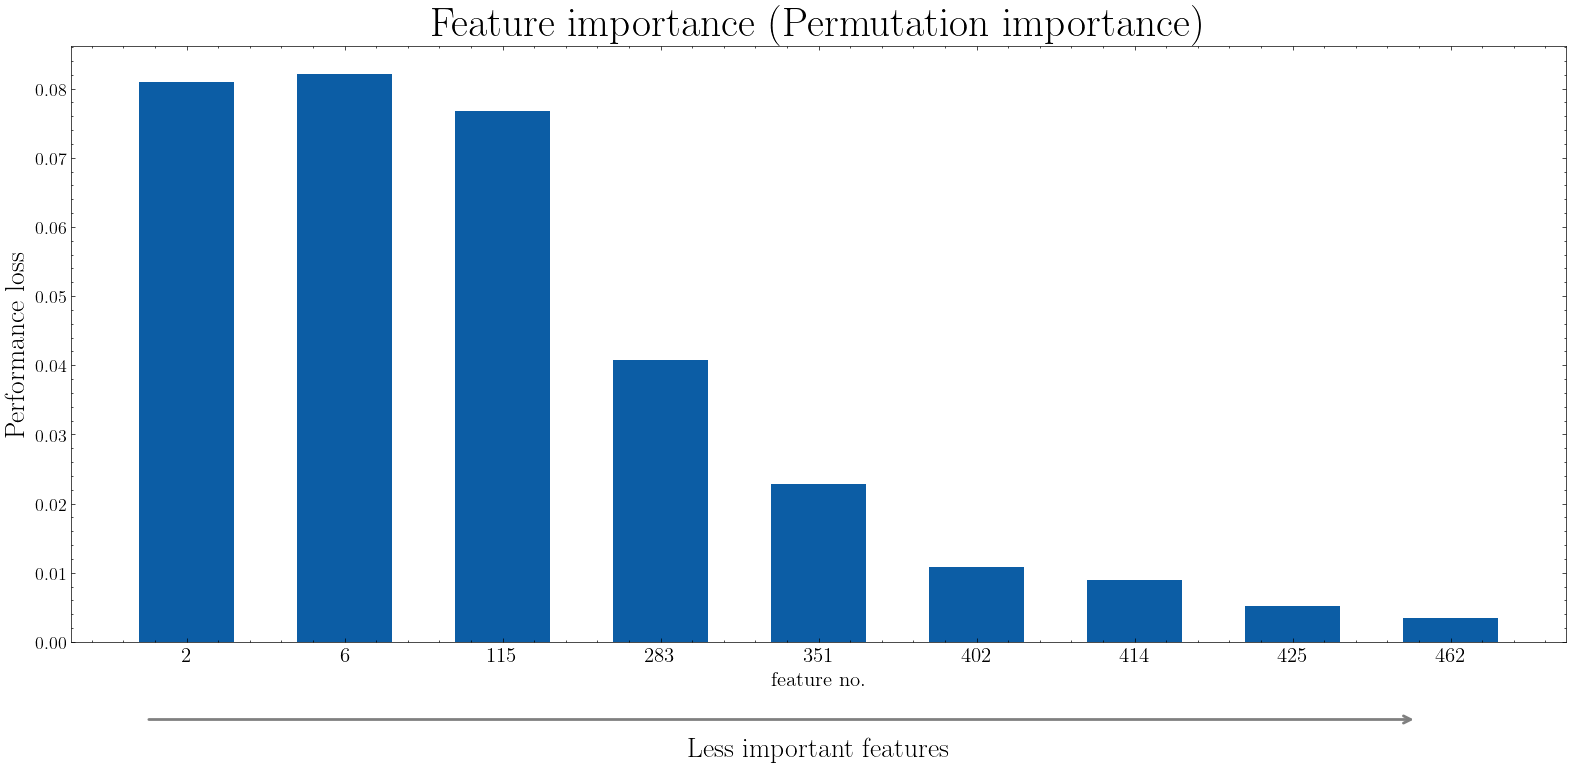

In [111]:

metrics = list(PI.keys())
values = [v for v in PI.values()] 

plt.rcParams['font.size'] = 13
with plt.style.context('science'): 
    fig, ax = plt.subplots(figsize=(16, 8), dpi=100)

    x = np.arange(len(metrics))
    ax.bar(x, values, width=0.6, label='Model Performance')

    ax.set_ylabel("Performance loss", fontsize=20)
    ax.set_title("Feature importance (Permutation importance)", fontsize=30)
    ax.set_xlabel('feature no.', fontsize = 15)
    ax.set_xticks(x)
    ax.set_xticklabels(metrics, fontsize=15)
    

    fig.canvas.draw()

    
    ax.annotate(
        '', xy=(0.05, -0.13), xytext=(0.9, -0.13),
        xycoords='axes fraction', textcoords='axes fraction',
        arrowprops=dict(arrowstyle='<-', color='gray', lw=2)
    )

    
    ax.text(
        0.5, -0.16, 'Less important features',
        transform=ax.transAxes,
        ha='center', va='top',
        fontsize=20, color='black'
    )

    plt.tight_layout()

    plt.show()

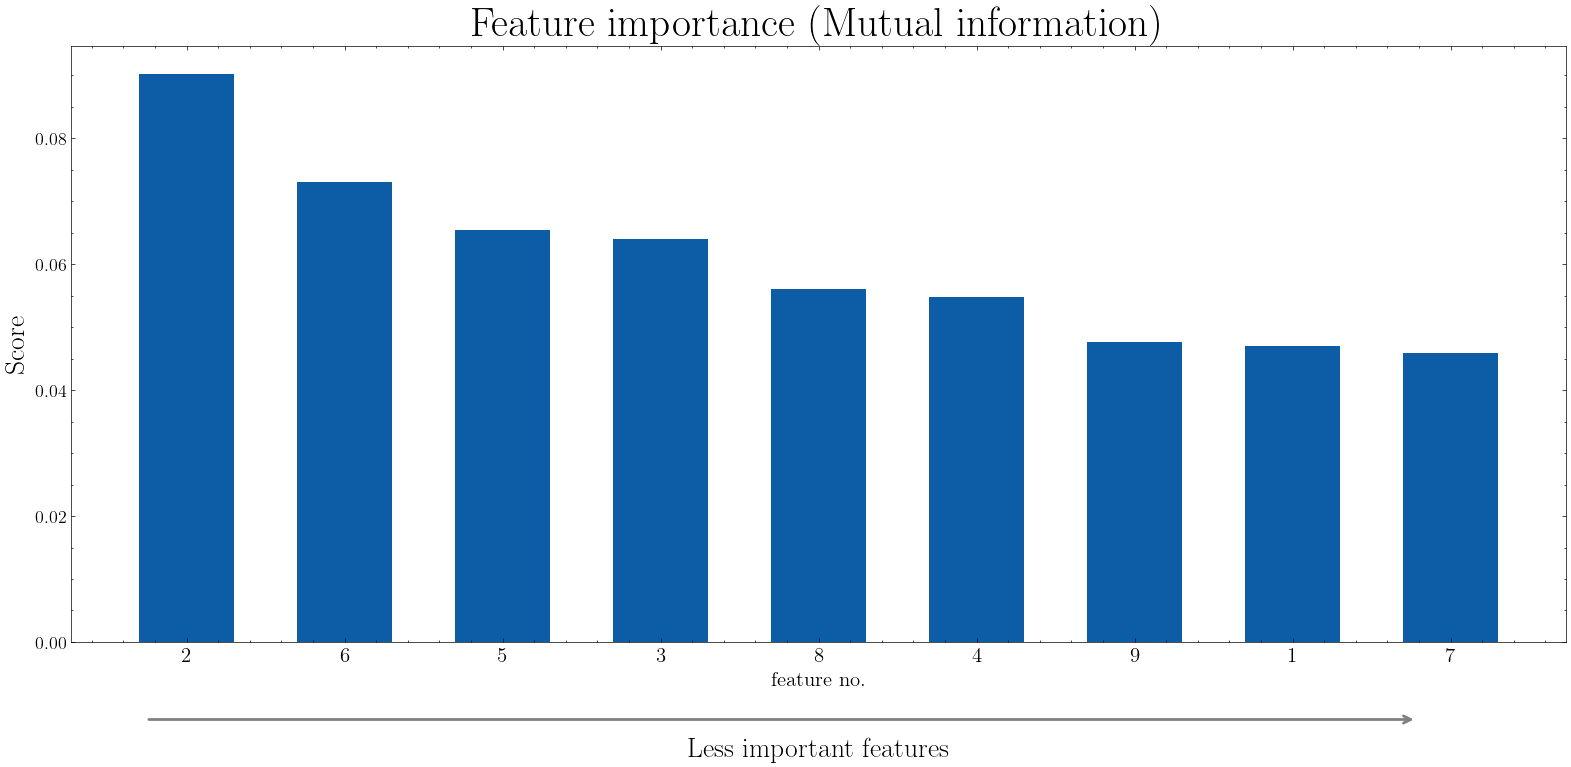

In [115]:
# Extract keys and values
metrics = list(MI.keys())
values = [v for v in MI.values()]  # Convert to percent

plt.rcParams['font.size'] = 13
with plt.style.context('science'):  # Optional: requires `SciencePlots` package
    fig, ax = plt.subplots(figsize=(16, 8), dpi=100)

    x = np.arange(len(metrics))  # x locations
    ax.bar(x, values, width=0.6, label='Model Performance')

    ax.set_ylabel("Score", fontsize=20)
    ax.set_title("Feature importance (Mutual information)", fontsize=30)
    ax.set_xticks(x)
    ax.set_xlabel('feature no.', fontsize = 15)
    ax.set_xticklabels(metrics, fontsize=15)
    

    fig.canvas.draw()  # Needed to define bbox

    # Add arrow using axes coordinates
    ax.annotate(
        '', xy=(0.05, -0.13), xytext=(0.9, -0.13),  # in axes fraction
        xycoords='axes fraction', textcoords='axes fraction',
        arrowprops=dict(arrowstyle='<-', color='gray', lw=2)
    )

    # Add text below arrow
    ax.text(
        0.5, -0.16, 'Less important features',
        transform=ax.transAxes,
        ha='center', va='top',
        fontsize=20, color='black'
    )

    plt.tight_layout()

    plt.show()